# Astropy

As can be read on their [official project site ](https://www.astropy.org)
> _**The Astropy Project is a community effort to develop a common core package for Astronomy in Python and foster an ecosystem of interoperable astronomy packages.**_

Hence, undoubtedly Astropy is one of the most crucial libraries to work with Astronomy in Python. And we are about to explore its various functionalities! (Not before enjoying a personal attack in the form of meme 🙃)
<br><br>
<div style="text-align: center">
<img src="assets/meme-1.jpg" width="600">
</div>

# 1. Astropy Constants
### Topics

- Overview
- Various Collections of Constants

### Overview

`astropy.constants` contains a number of physical constants useful in Astronomy. Constants are `Quantity` objects with additional meta-data describing their history of origin, references and uncertainties. Trust me, it is far easier to use them than what your read here.

In [1]:
import astropy

In [2]:
from astropy import constants as const

In [3]:
print(const.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [4]:
# lets try some more!
print(const.c)
print('-'*30)
print(const.m_e)

  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
------------------------------
  Name   = Electron mass
  Value  = 9.1093837015e-31
  Uncertainty  = 2.8e-40
  Unit  = kg
  Reference = CODATA 2018


In [5]:
# We can even use the constants in different units
print(const.c.to('km/s'))
print(const.c.cgs)

299792.458 km / s
29979245800.0 cm / s


In [6]:
# To only access a property of the constant, use {const}.{property}
print(const.c.name)
print(const.c.value)
print(const.c.uncertainty)
print(const.c.unit)
print(const.c.reference)

Speed of light in vacuum
299792458.0
0.0
m / s
CODATA 2018


### Various Collections of Constants

One can access different versions of constants from different packaged modules. The constants may vary in some precision in value, uncertainity and/or the reference.
Physical CODATA constants are in modules with names like `codata2010`, `codata2014`, or `codata2018`.
Astronomical constants defined (primarily) by the International Astronomical Union (IAU) are collected in modules with names like `iau2012` or `iau2015`.

Let's try and understand!

In [7]:
# Physical CODATA constants
from astropy.constants import codata2014 as const14
print(const14.h)
print('-'*30)
from astropy.constants import codata2018 as const18
print(const18.h)

  Name   = Planck constant
  Value  = 6.62607004e-34
  Uncertainty  = 8.1e-42
  Unit  = J s
  Reference = CODATA 2014
------------------------------
  Name   = Planck constant
  Value  = 6.62607015e-34
  Uncertainty  = 0.0
  Unit  = J s
  Reference = CODATA 2018


In [8]:
# Astronomical constants
from astropy.constants import iau2012 as const12
print(const12.L_sun)
print('-'*60)
from astropy.constants import iau2015 as const15
print(const15.L_sun)

  Name   = Solar luminosity
  Value  = 3.846e+26
  Uncertainty  = 5e+22
  Unit  = W
  Reference = Allen's Astrophysical Quantities 4th Ed.
------------------------------------------------------------
  Name   = Nominal solar luminosity
  Value  = 3.828e+26
  Uncertainty  = 0.0
  Unit  = W
  Reference = IAU 2015 Resolution B 3


# 2. Astropy Units and Quantities

In astronomy (and most sciences) we typically have to deal with quantities which have some dimension (i.e. unit). The quantity is completely represented by not only a number but also a unit to go along with it. When we consider the same quantity in a different unit system, the quantity itself will not change, although the number used to represent it does change. While solving involved problems with several dimensional quantities, it may become cumbersome to keep track of the quantity if our program stores it as a single number with implied units. Astropy units library is a useful way to keep track of a dimensional quantity

In [9]:
import numpy as np
from astropy import units as u 

# initialise a dimensional quantity
q = 42.0 * u.m 
lengths = [1,2,3]*u.m

# printing the quantities properties individually
print(q.value, q.unit)
print(lengths.value, lengths.unit)
print(lengths[0].value, lengths[0].unit)

42.0 m
[1. 2. 3.] m
1.0 m


In [10]:
# As obvious it is, you can multiply/divide any units to get some new dimenion unit.
# But addition and subtraction is only compatible with same unit quantities.

distance2 = 45 * u.m
distance1 = 5*u.m
time = 2 * u.s

speed = (distance2 - distance1)/time
print(speed)

20.0 m / s


In [11]:
# We can also use the units library to interconvert between different unit systems using the to() method.
# Note that after calling this method, the value stored in quantity.value and quantity.unit don't change.
# Another method for converting to cgs/SI is also shown below.


print(speed.to(u.km/u.hour))
print(speed.value)
print(speed.unit)
print((1*u.Joule).cgs)
print((10*u.cm).si)

72.0 km / h
20.0
m / s
10000000.0 erg
0.1 m


In [12]:
# A special type of unit in the astropy.units package is the dimensionless quantity.
# This can either be initialised directly or come out from units cancelling out.

refractive_index = 1.5 *u.dimensionless_unscaled
print(refractive_index.value,refractive_index.unit) #No unit is printed, as the quantity is dimensionless

distance_ratio1 = (1*u.m)/(2*u.m)
print(distance_ratio1.value,distance_ratio1.unit)#This is a true unscaled dimensionless quantity

distance_ratio2 = (1*u.km)/(2*u.m)
print(distance_ratio2.value,distance_ratio2.unit)#This is also dimensionless, but value is scaled

print(distance_ratio1.unit == refractive_index.unit)#both are dimensionless unscaled
print(distance_ratio1.unit == distance_ratio2.unit)#both are dimensionless, but one is scaled, the other is not

1.5 
0.5 
0.5 km / m
True
False


In [13]:
# now let us explore some astronomical quantities!
r = 1*u.AU
d = 1*u.parsec
print(d/r)
print(float(d/r)) # Notice how the float method is used to convert dimensionless scaled quatities to numbers
                  # The float method will not work with quantities having some dimension

AvgDensity_of_sun = 1*u.Msun/(4*np.pi/3*(1*u.Rsun)**3)
print(AvgDensity_of_sun.to(u.kg/u.m**3)) # Side note: note how this quite close to density of water

1.0 pc / AU
206264.80624709633
1409.7798243075256 kg / m3


In [14]:
# One more thing! Astropy can also perform 'implicit' conversions.
# Lke converting wavelength of light to frequency (in vacuum), by specifying the equivalencies parameter.

print((1000 * u.nm).to(u.Hz, equivalencies=u.spectral()))

299792457999999.94 Hz


Pretty cool, right?

Now, let us explore some core astronomical phenomenon using the above two modules.

## Filters in Astronomy
Astronomers often use various filters for taking images. These filters selectively allow light of certain wavelengths to pass through them while rejecting others. Several filter systems are in use, and the filters used for a certain observation are usually specified along with the observation data. Here, we will take up a specific filter system, SDSS (Sloan Digital Sky Survey). In general the analysis of any other filter system will also be similar. In this exercise, we will try to plot the $B(\lambda)$ with $\lambda$. 

Recall that Planck's formula for the black body spectrum is given by:$$B(\lambda,T) = \frac{2\pi hc^2}{\lambda^5}\left(\frac{1}{exp\left(\frac{hc}{\lambda k_BT}\right)-1}\right)$$ $h$ is the planck's constant, $c$ is the speed of light and $k_B$ is Boltzmann constant. $\lambda$ and $T$ represent the wavelength at which $B$ is measured and temperature of blackbody, respectively.

$B(\lambda,T)d\lambda$ gives the energy emitted per unit time per unit area of blackbody in the form of light having wavelengths within a wavelength interval of (small) width $d\lambda$ centred at said $\lambda$. We will first write a function that returns B with its proper unit (which is $Wm^{-3}$)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const

In [16]:
def B(wl,T):
    exponential = 1 / (np.exp(const.h*const.c/(wl*const.k_B*T))-1)
    prefactor = 2 * np.pi * const.h * const.c**2 / wl**5
    return prefactor * exponential

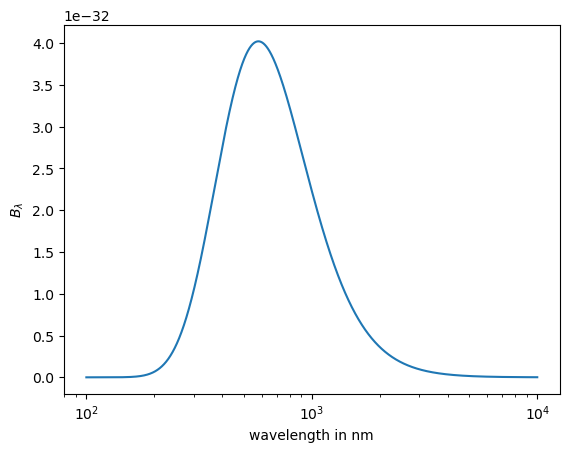

In [17]:
plt.style.use('default')
wl0 = np.linspace(100,10000,1000000)*u.nm
T0 = 5000 * u.K
plt.xscale('log')
plt.xlabel('wavelength in nm')
plt.ylabel('$B_\lambda$')
plt.plot(wl0.value,B(wl0,T0).value)
plt.show()

# 3. Astropy Coordinates

### Topics

- Coordinate Systems
- Coordinate Transformations
- Distances and Separation
- `Astropy.SkyCoord` features
- Crossmatching

### Overview

Astronomers use a wide variety of coordinate systems and formats to represent sky coordinates of celestial objects. For example, you may have seen terms like "right ascension" and "declination" or "galactic latitude and longitude," and you may have seen angular coordinate components represented as "0h39m15.9s," "00:39:15.9," or 9.81625º. The subpackage `astropy.coordinates` provides tools for representing the coordinates of objects and transforming them between different systems.

In [18]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

In [22]:
c = SkyCoord(ra=88.79293899*u.degree, dec=7.407064*u.degree, frame='icrs')
print(c)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.407064)>


In [20]:
c.ra.degree 

88.79293899

In [21]:
c.ra.hour 

5.9195292660000005

In [22]:
c.ra.hms

hms_tuple(h=5.0, m=55.0, s=10.305357600001628)

In [23]:
c.dec.degree

7.407064

In [24]:
c.dec.radian

0.12927765470594127

In [21]:
# from astropy.coordinates import get_constellation
from astropy import coordinates as co

In [23]:
co.get_constellation(c)

'Orion'

You can also find out the constellation of the astronomical object using `get_constellation`. Can you guess whose coordinates are given in this example?

In [25]:
c.get_constellation(short_name=False, constellation_list='iau')

'Orion'

Coordinates can also be converted to strings using the `to_string()` method:

In [26]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree)
print(c.to_string('decimal'))
print(c.to_string('dms'))
print(c.to_string('hmsdms')) 

10.6846 41.2692
10d41m04.488s 41d16m09.012s
00h42m44.2992s +41d16m09.012s


## Transformation

Astropy allows you to easily switch between different coordinate systems such as FK4/FK5, Galactic, ICRS and different epochs and equinox as well. Read more about these coordinate frames [here](https://adl1995.github.io/an-introduction-to-coordinate-systems-used-in-astronomy.html) and equinox and epochs [here.](https://oneau.wordpress.com/2011/10/27/equinox-epoch) International Celestial Reference System (ICRS) is the most commonly used system and you may assume the coordinates to be in ICRS if nothing else is specified. 

In [27]:
c_icrs = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, frame='icrs')
c_icrs.galactic 

<SkyCoord (Galactic): (l, b) in deg
    (121.17424181, -21.57288557)>

For more control, you can use the `transform_to` method, which accepts a frame name, frame class, or frame instance.

In [28]:
c_fk5 = c_icrs.transform_to('fk5')  # c_icrs.fk5 does the same thing
c_fk5 

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (10.68459154, 41.26917146)>

In [29]:
from astropy.coordinates import FK5
c_fk5.transform_to(FK5(equinox='J1975')) 

<SkyCoord (FK5: equinox=J1975.000): (ra, dec) in deg
    (10.34209135, 41.13232112)>

## Distances and Convenience Methods

Astropy offers a really convenient method to calculate angular distance between 2 points in the night sky given their coordinates. Without Astropy you would have had to apply the Haversine formula which looks something like this:

<p align="centre">
<img src="assets/img1.png" width="400">
</p>

Astropy is convenient right?

In [24]:
c1 = SkyCoord(ra=10.7855*u.degree, dec=9.420*u.degree, frame='icrs')
c2 = SkyCoord(ra=11.0990*u.degree, dec=9.767*u.degree, frame='icrs') 
#define c1 and c2 to be 2 different coordinates

c2.separation(c1)*u.degree #on sky separation

<Quantity 0.46471624 deg2>

If you know the individual distance to the objects, you can also find the 3d distance between the 2 objects.

In [31]:
c1 = SkyCoord(ra=10.7855*u.degree, dec=9.420*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11.0990*u.degree, dec=7.767*u.degree, distance=11.5*u.pc, frame='icrs')
c1.separation_3d(c2) 

<Distance 1.53267013 pc>

The astropy.coordinates sub-package also provides a quick way to get coordinates for named objects, assuming you have an active internet connection. The `from_name` method of SkyCoord uses [Sesame](http://cds.u-strasbg.fr/cgi-bin/Sesame) to retrieve coordinates for a particular named object.

In [32]:
SkyCoord.from_name("PSR J1012+5307") 

<SkyCoord (ICRS): (ra, dec) in deg
    (153.13930897, 53.11737904)>

In [33]:
SkyCoord.from_name("Rigel") 

<SkyCoord (ICRS): (ra, dec) in deg
    (78.63446707, -8.20163836)>

In some cases, the coordinates are embedded in the catalog name of the object. For such object names, `from_name` is able to parse the coordinates from the name if given the `parse=True` option. For slow connections, this may be much faster option.

In [34]:
SkyCoord.from_name("CRTS SSS100805 J194428-420209", parse=True) 

<SkyCoord (ICRS): (ra, dec) in deg
    (296.11666667, -42.03583333)>

Astropy also provides a quick way to access the location of Earth observatories using the name of the observatory. The location can be returned as geodetic (latitude/longitude/height) or geocentric (x/y/z). 

In [35]:
from astropy.coordinates import EarthLocation
keck = EarthLocation.of_site('Keck Observatory')  
keck.geodetic

GeodeticLocation(lon=<Longitude -155.47833333 deg>, lat=<Latitude 19.82833333 deg>, height=<Quantity 4160. m>)

## Crossmatching

Let us now look at the one of the best features of Astropy- its crossmatching tool. Astronomical data analysis involving studying the properties of a particular object in different bands (frequency ranges) and thus, we need to combine the data of an object from different surveys or different telescopes/observatories around the world. Thus we crossmatch different catalogues with each other to identify common sources in the catalogues and then make a new aggregate catalogue combining the initial data.

Here's a good video to learn more about crossmatching and understand the need to [crossmatch](https://www.coursera.org/lecture/data-driven-astronomy/what-is-cross-matching-s0plL).

In [27]:
#Let us first load in the 2 catalogs that we need to crossmatch
df1= pd.read_csv('Binaries.csv') #Catalog of X-ray binaries
df1.head()

,ra,dec,Source_Name,Fx(uJy),SIMBAD_Name,Final_Type
0,8.233750,-73.805278,J0032.9-7348,0.2,RX J0032.9-7348,HMXB
1,12.373333,-73.182222,J0049-732,0.04,[MA93] 300,HMXB
2,12.260417,-72.847778,J0049-729,0.5,RX J0049.0-7250,HMXB
3,13.025417,-72.435000,0050-727,1,LIN 198,HMXB
4,12.686250,-73.268056,J0050.7-7316,0.16,V* DZ Tuc,HMXB


In [37]:
df2 = pd.read_csv('AstroSat.csv') #Catalog of Astrosat observations in the past 2 years
df2.head()

,Date_Observed,ra,dec,SIMBAD_Name,Source_Type
0,08-09-2018,311.040700,-10.723457,Mrk 509,Seyfert_1
1,09-09-2018,308.063667,37.637472,V* V2246 Cyg,HMXB
2,10-09-2018,274.005787,-14.036283,V* NP Ser,LMXB
3,11-09-2018,248.506708,-47.393000,X Nor X-1,LMXB
4,11-09-2018,356.770150,51.704970,QSO B2344+514,BLLac


We need to find out if any X-ray binaries were observed by AstroSat in the past 2 years. Thus we crossmatch the Binaries catalog with AstroSat catalog to find out any common sources in the 2 datasets.

In [38]:
ra1 = np.asarray(df1['ra'])
dec1 = np.asarray(df1['dec'])
ra2 = np.asarray(df2['ra'])
dec2 = np.asarray(df2['dec'])

c1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree, frame='icrs')
c2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree, frame='icrs')

idx,d2d,d3d = (c1).match_to_catalog_sky(c2)

The `match_to_catalog_sky` function finds the nearest source in catalog 2 for a source in catalog 1. 
- idx *integer array* : The index of nearest source in cat2 for each source in cat1 
- d2d *angle* : The on-sky separation between the closest match for each element

In [39]:
df1['Astrosat_Flag'] = np.zeros(len(df1))
df1['Date_Observed'] = np.zeros(len(df1))

We now set that threshold for max separation as **10 arcsec**. That is if the separation of a source in catalog 1 and catalog 2 is less than 10 arcsec then it must imply that they are the same source. The threshold 10 arcsec is just our max threshold for errors and to get more accurate results we can decrease the threshold.

In [40]:
matches = []
max_radius = 10./3600 #N

for id1, (closest_id2, dist) in enumerate(zip(idx, d2d)): #iterate over every element in idx
    closest_dist = dist.value
      
    if closest_dist < max_radius: #if closest_distance is less than max threshold for errors they must be the same object
        matches.append([id1, closest_id2, closest_dist])
        df1['Astrosat_Flag'][id1] = 1 #Set Flag = 1 if there is a match
        df1['Date_Observed'][id1] = df2['Date_Observed'][closest_id2]

print(len(matches)) #number of common sources
print(df1[df1['Astrosat_Flag']==1].head())

26
            ra        dec       Source_Name Fx(uJy) SIMBAD_Name Final_Type  \
10   13.639167 -73.684444   0053-739              1   X SMC X-2       HMXB   
48   84.727500  26.315833   0535+262              3   HD 245770       HMXB   
50   84.735000 -64.083611   0538-641            1.7   X LMC X-3       HMXB   
51   84.911250 -69.743333   0540-697              3   X LMC X-1       HMXB   
64  135.528750 -40.554722   0900-403              2   V* GP Vel       HMXB   

    Astrosat_Flag Date_Observed  
10            1.0    07-05-2020  
48            1.0    12-11-2020  
50            1.0    12-01-2020  
51            1.0    31-03-2020  
64            1.0    24-12-2018  


<ipython-input-40-46c08c5dbd87>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Astrosat_Flag'][id1] = 1 #Set Flag = 1 if there is a match
<ipython-input-40-46c08c5dbd87>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date_Observed'][id1] = df2['Date_Observed'][closest_id2]
/home/b_anshuman/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_singl

### Digression

As a HW problem you may try crossmatching using a simple *for-loop* and `SkyCoord.separation()` instead of `match_to_catalog_sky` and compare the times taken for each. Which do you think is faster?